# R for Drug Development

## Machine Learning for Drug Adverse Event Discovery


![](http://deepscreening.xielab.net/static/img/dpvs.png)

### [See more orginary post](https://www.r-bloggers.com/2016/09/machine-learning-for-drug-adverse-event-discovery/)

### Data

In [5]:
my_data<-read.csv("Machine-Learning-for-Drug-Adverse-Event-Discovery.csv")

In [6]:
head(my_data)

,route,age,sex,outc_cod,indi_pt,pt
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,ORAL,63,M,OT,RHEUMATOID ARTHRITIS,VASCULITIC RASH
2,ORAL,66,F,OT,RHEUMATOID ARTHRITIS,VASCULITIC RASH
3,ORAL,66,M,OT,RHEUMATOID ARTHRITIS,VASCULITIC RASH
4,ORAL,57,M,OT,RHEUMATOID ARTHRITIS,VASCULITIC RASH
5,ORAL,66,M,OT,RHEUMATOID ARTHRITIS,VASCULITIC RASH
6,ORAL,66,M,OT,RHEUMATOID ARTHRITIS,VASCULITIC RASH


### Hierarchical Clustering

In [9]:
age = my_data$age

In [13]:
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:sos’:

    matches


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [14]:
my_data = select(my_data,-age)

In [16]:
head(my_data)

,route,sex,outc_cod,indi_pt,pt
,<chr>,<chr>,<chr>,<chr>,<chr>
1,ORAL,M,OT,RHEUMATOID ARTHRITIS,VASCULITIC RASH
2,ORAL,F,OT,RHEUMATOID ARTHRITIS,VASCULITIC RASH
3,ORAL,M,OT,RHEUMATOID ARTHRITIS,VASCULITIC RASH
4,ORAL,M,OT,RHEUMATOID ARTHRITIS,VASCULITIC RASH
5,ORAL,M,OT,RHEUMATOID ARTHRITIS,VASCULITIC RASH
6,ORAL,M,OT,RHEUMATOID ARTHRITIS,VASCULITIC RASH


### Create a Matrix

In [20]:
my_matrix = as.data.frame(do.call(cbind, lapply(my_data, function(x) table(1:nrow(my_data), x))))

In [22]:
head(my_matrix)

,INTRAVENOUS,OPHTHALMIC,ORAL,TOPICAL,F,M,DE,HO,LT,OT,RHEUMATOID ARTHRITIS,Senile osteoporosis,TONSILLITIS,URINARY TRACT INFECTION,Sepsis,VASCULITIC RASH,VOMITING
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0
3,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0
4,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0
5,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0
6,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0


In [23]:
my_matrix$Age=age

In [24]:
head(my_matrix)

,INTRAVENOUS,OPHTHALMIC,ORAL,TOPICAL,F,M,DE,HO,LT,OT,RHEUMATOID ARTHRITIS,Senile osteoporosis,TONSILLITIS,URINARY TRACT INFECTION,Sepsis,VASCULITIC RASH,VOMITING,Age
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,63
2,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,66
3,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,66
4,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,57
5,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,66
6,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,66


In [25]:
library(caret)
preproc = preProcess(my_matrix)
my_matrixNorm = as.matrix(predict(preproc, my_matrix))

Loading required package: lattice

Loading required package: ggplot2



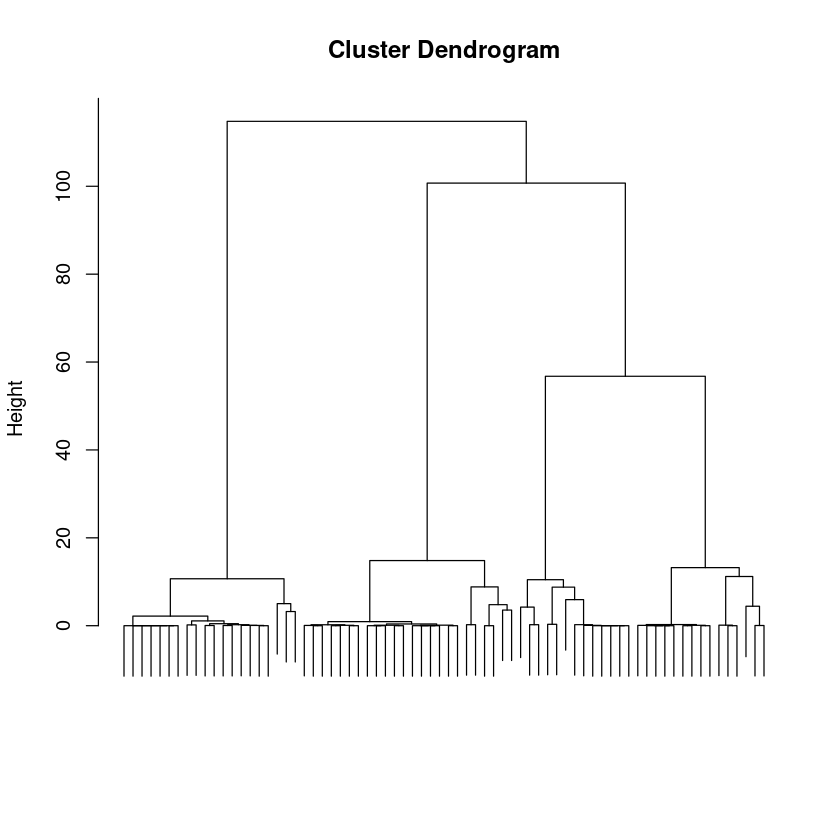

In [26]:
distances = dist(my_matrixNorm, method = "euclidean")
clusterdrug = hclust(distances, method = "ward.D") 
plot(clusterdrug, cex=0.5, labels = FALSE,cex=0.5,xlab = "", sub = "",cex=1.2)

In [29]:
library(dendextend)

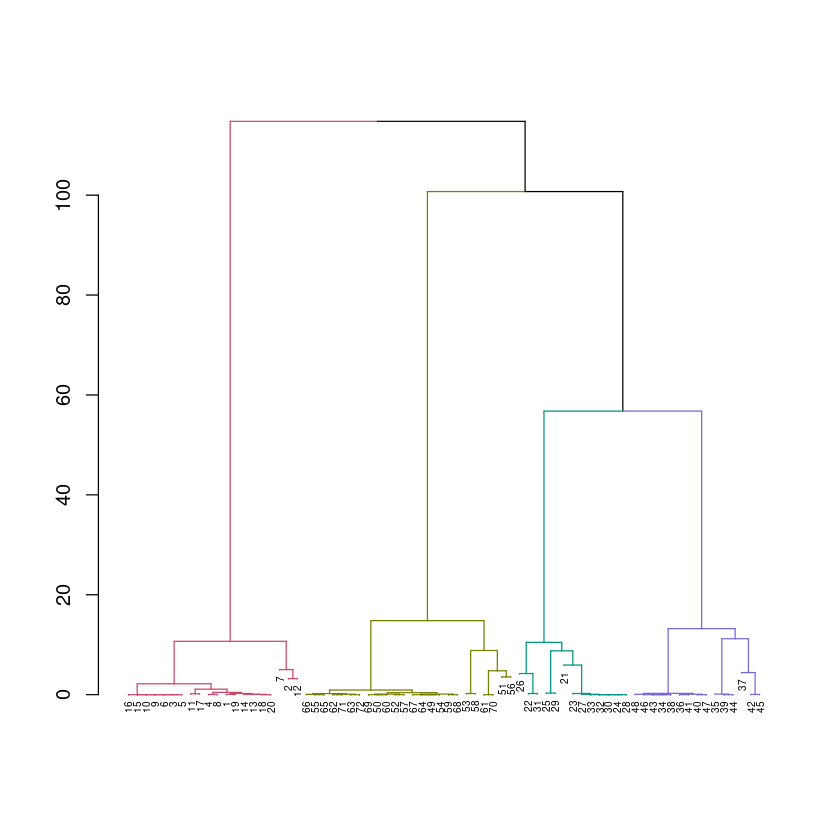

In [30]:
library(dendextend)
dend <- as.dendrogram(clusterdrug) 
# install.packages("dendextend") 
# library(dendextend)
# Color the branches based on the clusters:
dend <- color_branches(dend, k=4) #, groupLabels=iris_species)
# We hang the dendrogram a bit:
dend <- hang.dendrogram(dend,hang_height=0.1)
# reduce the size of the labels:
# dend <- assign_values_to_leaves_nodePar(dend, 0.5, "lab.cex")
dend <- set(dend, "labels_cex", 0.5)
plot(dend)

In [31]:
clusterGroups = cutree(clusterdrug, k = 4)

In [33]:
my_data= cbind(data.frame(Cluster=clusterGroups), my_data, age)
head(my_data)

,Cluster,route,sex,outc_cod,indi_pt,pt,age
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,1,ORAL,M,OT,RHEUMATOID ARTHRITIS,VASCULITIC RASH,63
2,1,ORAL,F,OT,RHEUMATOID ARTHRITIS,VASCULITIC RASH,66
3,1,ORAL,M,OT,RHEUMATOID ARTHRITIS,VASCULITIC RASH,66
4,1,ORAL,M,OT,RHEUMATOID ARTHRITIS,VASCULITIC RASH,57
5,1,ORAL,M,OT,RHEUMATOID ARTHRITIS,VASCULITIC RASH,66
6,1,ORAL,M,OT,RHEUMATOID ARTHRITIS,VASCULITIC RASH,66


### Number of Observations in Each Cluster

In [34]:
observationsH=c()
for (i in seq(1,4)){
  observationsH=c(observationsH,length(subset(clusterdrug, clusterGroups==i)))
}
observationsH =as.data.frame(list(cluster=c(1:4),Number_of_observations=observationsH))
observationsH 

cluster,Number_of_observations
<int>,<int>
1,20
2,13
3,15
4,24


### What is the most common observation in each cluster?

In [35]:
z=do.call(cbind,lapply(1:4, function(i) round(colMeans(subset(my_matrix,clusterGroups==i)),2)))
colnames(z)=paste0('cluster',seq(1,4))
z

,cluster1,cluster2,cluster3,cluster4
INTRAVENOUS,0.00,0.00,1.00,0.00
OPHTHALMIC,0.00,0.00,0.00,0.92
ORAL,1.00,0.08,0.00,0.08
TOPICAL,0.00,0.92,0.00,0.00
F,0.10,0.85,0.80,1.00
M,0.90,0.15,0.20,0.00
DE,0.00,0.00,0.00,0.83
HO,0.05,0.77,0.07,0.04
LT,0.05,0.08,0.80,0.04
OT,0.90,0.15,0.13,0.08


In [42]:
my_data<-read.csv("Machine-Learning-for-Drug-Adverse-Event-Discovery.csv")